In [57]:
from glob import glob
import plantcv as pcv
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [58]:
def lab_threshold(img, l_factor = 0.4, b_factor = 0.56, k1 = 7, k2 = 5, closing = False, plot = False):
    
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = lab_img[:,:,0]/255,lab_img[:,:,1]/255, lab_img[:,:,2]/255

    mask = np.zeros(l.shape)
    cond_l = l < l_factor
    cond_b = np.logical_and(l < 0.43, b > b_factor )
    cond = np.logical_or(cond_l, cond_b)
    mask[cond] = 255
    # close retrieved shapes
    if closing:
        kernel = np.ones((k2,k2),np.uint8)
        output = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # remove noise in the background
    kernel = np.ones((k1,k1), np.uint8)
    output = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    if plot:
 
        for i in[img, l, a, b, mask]:
            plt.imshow(i)
            plt.show()
   
    return output

  0%|          | 0/650 [00:00<?, ?it/s]

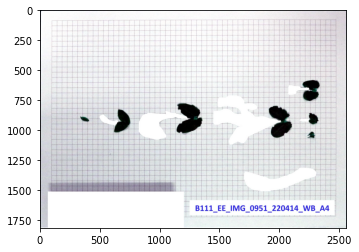

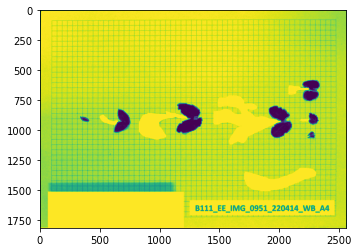

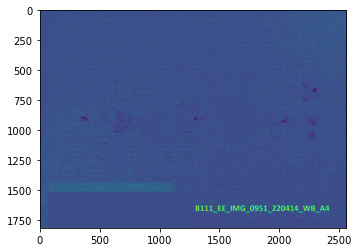

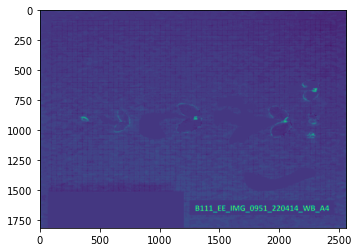

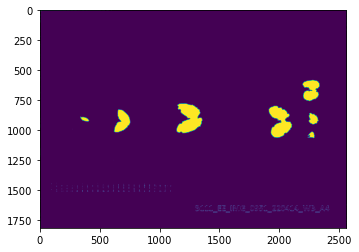

  0%|          | 1/650 [00:02<31:50,  2.94s/it]

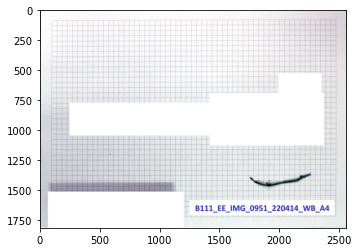

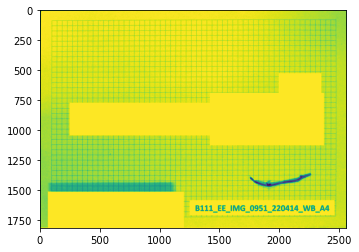

  0%|          | 1/650 [00:04<49:30,  4.58s/it]


KeyboardInterrupt: 

In [59]:
paths = glob(os.getcwd() + '/images/AnalyseLeafArea_PO/*s.JPG')
outpath = os.getcwd() + '/images/AnalyseLeafArea_PO_output'
arr = []

for p in tqdm(paths):
    fn = p.split('/')[-1]
    img = cv2.imread(p)

    mask = lab_threshold(img, closing = True)

    #save output
    cv2.imwrite( outpath + '/mask_' + fn, mask)
    h, w = mask.shape
    tot_pixels = h*w
    
    n_pixels = np.count_nonzero(mask)
    res = n_pixels / tot_pixels
    arr.append([fn, n_pixels, tot_pixels, res])

df = pd.DataFrame(np.array(arr), columns = ['Filename', 'Green pixels', 'Total pixels', 'Coverage'])
df.to_csv('coverage_results.csv', index = False)



Image name B111_EE_IMG_0951_220414_WB_A4_Tiges.JPG


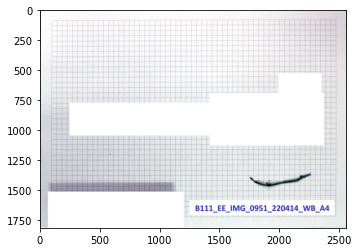

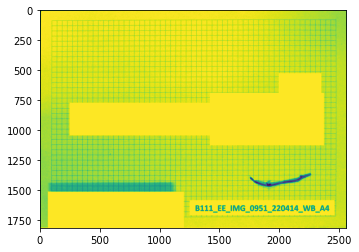

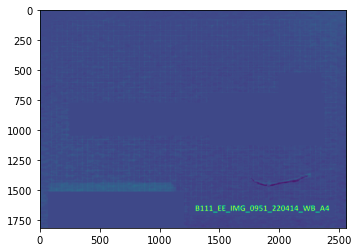

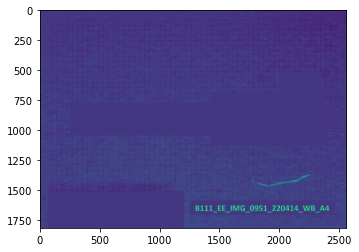

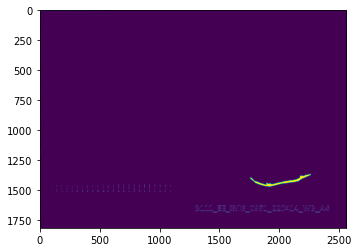

In [56]:
n = 1
img = cv2.imread(paths[n])
print('Image name', paths[n].split('/')[-1])
mask = lab_threshold(img,  closing = True)